<a href="https://colab.research.google.com/github/becharar1/tutorials-done/blob/main/trial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [93]:
import pandas as pd
df=pd.read_csv("weather copie.csv", delimiter= ',')
print (df)

                 event_start  belief_horizon_in_sec  event_value       sensor  \
0     2020-11-01 00:00:00+00                   -637        11.36  temperature   
1     2020-11-01 00:00:00+00                  35362        11.06  temperature   
2     2020-11-01 00:00:00+00                  38960        11.41  temperature   
3     2020-11-01 00:00:00+00                  28162        11.25  temperature   
4     2020-11-01 00:00:00+00                   2969        11.39  temperature   
...                      ...                    ...          ...          ...   
2262  2020-11-12 06:00:00+00                  38970         9.85  temperature   
2263  2020-11-12 06:00:00+00                  35369        10.57  temperature   
2264  2020-11-12 06:00:00+00                  28169         9.85  temperature   
2265  2020-11-12 06:00:00+00                  24568         9.98  temperature   
2266  2020-11-12 06:00:00+00                  13765         9.88  temperature   

     unit  
0      °C  
1  

-0.3517275334843442


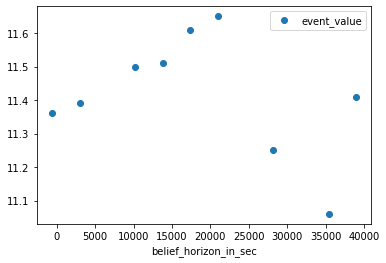

In [94]:
dffirst=df.head(9)
print (dffirst['belief_horizon_in_sec'].corr(dffirst['event_value']))
dffirst.plot(x='belief_horizon_in_sec', y='event_value', style='o')

               event_start  belief_horizon_in_sec  event_value       sensor  \
10  2020-11-01 01:00:00+00                   6569        11.06  temperature   
11  2020-11-01 01:00:00+00                  38962        10.78  temperature   
12  2020-11-01 01:00:00+00                  31762        10.98  temperature   
13  2020-11-01 01:00:00+00                  20974        11.30  temperature   
14  2020-11-01 01:00:00+00                  17375        11.21  temperature   
15  2020-11-01 01:00:00+00                   2963        10.99  temperature   
16  2020-11-01 01:00:00+00                   -639        10.95  temperature   
17  2020-11-01 01:00:00+00                  10170        11.10  temperature   

   unit  
10   °C  
11   °C  
12   °C  
13   °C  
14   °C  
15   °C  
16   °C  
17   °C  


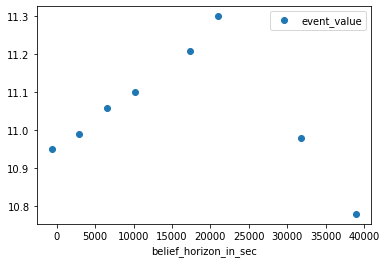

In [54]:
dfsecond=df.iloc[10:18]
print (dfsecond)
dfsecond.plot(x='belief_horizon_in_sec', y='event_value', style='o')

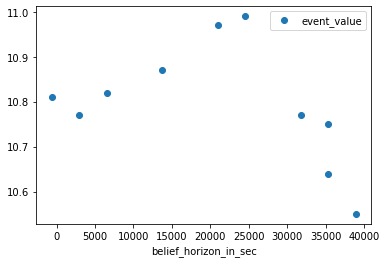

In [55]:
dfthird=df.iloc[18:28]
dfthird.plot(x='belief_horizon_in_sec', y='event_value', style='o')

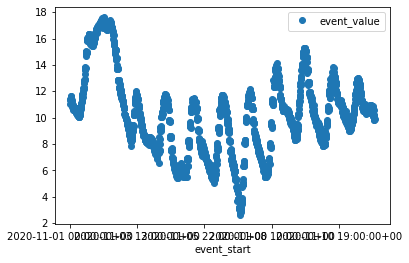

In [56]:
df.plot(x='event_start', y='event_value', style='o')

In [95]:
#I made use here of the prophet model provided in Python by Meta
#For this reason I had to change the event_start to no time zone
#The prophet model was modified to perform hourly predictions
dfnotimezone=df
dfnotimezone['event_start'] = dfnotimezone['event_start'].map(lambda x: x.strip('+00'))
dfnotimezone['event_start']= dfnotimezone['event_start'].astype(str)+ '00'
dfnotimezone['event_start'] =  pd.to_datetime(dfnotimezone['event_start'] , format='%Y%m%d %H:%M:%S')
forecast_data = dfnotimezone.rename(columns = {"event_start": "ds", 
                                       "event_value": "y"})
print(forecast_data)


                      ds  belief_horizon_in_sec      y       sensor unit
0    2020-11-01 00:00:00                   -637  11.36  temperature   °C
1    2020-11-01 00:00:00                  35362  11.06  temperature   °C
2    2020-11-01 00:00:00                  38960  11.41  temperature   °C
3    2020-11-01 00:00:00                  28162  11.25  temperature   °C
4    2020-11-01 00:00:00                   2969  11.39  temperature   °C
...                  ...                    ...    ...          ...  ...
2262 2020-11-12 06:00:00                  38970   9.85  temperature   °C
2263 2020-11-12 06:00:00                  35369  10.57  temperature   °C
2264 2020-11-12 06:00:00                  28169   9.85  temperature   °C
2265 2020-11-12 06:00:00                  24568   9.98  temperature   °C
2266 2020-11-12 06:00:00                  13765   9.88  temperature   °C

[2267 rows x 5 columns]


In [96]:
from prophet import Prophet
from prophet.plot import plot_plotly, plot_components_plotly
model = Prophet(changepoint_prior_scale=0.01)
model.fit(forecast_data)
forecasts = model.make_future_dataframe(periods=50, freq='H')
predictions = model.predict(forecasts)
plot_plotly(model, predictions)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_n2s1a20/qvr0trjm.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_n2s1a20/n8ns0kpc.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=40800', 'data', 'file=/tmp/tmp_n2s1a20/qvr0trjm.json', 'init=/tmp/tmp_n2s1a20/n8ns0kpc.json', 'output', 'file=/tmp/tmp_n2s1a20/prophet_modelbcu0klzb/prophet_model-20230104125715.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:57:15 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:57:15 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [101]:
df_unix_sec=dfnotimezone
df_unix_sec = dfnotimezone.sort_values(['event_start','belief_horizon_in_sec'],
              ascending = [True,True])

In [102]:
i=0
df_unix_sec['tdiff']=df_unix_sec['event_value']

In [103]:
while i<len(df_unix_sec):
  if df_unix_sec['belief_horizon_in_sec'].iloc[i]<0:
    a=df_unix_sec['event_value'].iloc[i]
    df_unix_sec['tdiff'].iloc[i]=0
  else:
    df_unix_sec['tdiff'].iloc[i]=df_unix_sec['event_value'].iloc[i]-a
  i=i+1
df_unix_sec['event_start'] = df_unix_sec[['event_start']].apply(lambda x: x[0].timestamp(), axis=1).astype(int)
df_unix_sec

/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,event_start,belief_horizon_in_sec,event_value,sensor,unit,tdiff
0,1604188800,-637,11.36,temperature,°C,0.00
4,1604188800,2969,11.39,temperature,°C,0.03
9,1604188800,6570,11.47,temperature,°C,0.11
8,1604188800,10171,11.50,temperature,°C,0.14
6,1604188800,13775,11.51,temperature,°C,0.15
...,...,...,...,...,...,...
2266,1605160800,13765,9.88,temperature,°C,-0.35
2265,1605160800,24568,9.98,temperature,°C,-0.25
2264,1605160800,28169,9.85,temperature,°C,-0.38
2263,1605160800,35369,10.57,temperature,°C,0.34


In [104]:
from sklearn import linear_model
import statsmodels.api as sm
x= df_unix_sec[['event_start', 'belief_horizon_in_sec']].copy()
y=df_unix_sec['tdiff']
model = sm.OLS(y, x).fit()
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                  tdiff   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.8792
Date:                Wed, 04 Jan 2023   Prob (F-statistic):              0.349
Time:                        12:58:01   Log-Likelihood:                -584.86
No. Observations:                2267   AIC:                             1174.
Df Residuals:                    2265   BIC:                             1185.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
event_start           -1.475e-

In [106]:
# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split# Split the data into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(x, y, test_size = 0.25, random_state = 42)

In [113]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)# Train the model on training data
rf.fit(train_features, train_labels);

In [115]:
# Use the forest's predict method on the test data
import numpy as np
predictions = rf.predict(test_features)# Calculate the absolute errors
errors = abs(predictions - test_labels)# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

Mean Absolute Error: 0.13 degrees.
